In [1]:
import numpy as np
# Importing Pandas Library 
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import *
import os
import joblib
from sklearn.preprocessing import MinMaxScaler
from utils import *

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Activation, Reshape, Concatenate

from models.EEGNet import *

from sklearn.metrics import confusion_matrix

from preprocessing import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
label_name = ['eyebrows', 'left', 'right', 'both', 'teeth']
models = []
scalers = {}

for label in label_name:
    _model = load_model(rf'.\pipeline_{label}\checkpoints\checkpoint.keras')
    _model.trainable = False
    _model = Model(inputs=_model.input, outputs=_model.layers[-4].output, name=label)
    print(_model.summary())
    models.append(_model)

    scalers[label] = joblib.load(rf'.\pipeline_{label}\checkpoints\scaler.save')

Model: "eyebrows"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 128, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 128, 16)     │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 128, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 1, 128, 48)     │           192 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 128, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 32, 48)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32, 48)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 1, 32, 16)      │         1,536 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 32, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 32, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,848 (11.12 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,848 (11.12 KB)

None


Model: "left"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 128, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 128, 16)     │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 128, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 1, 128, 48)     │           192 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 128, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 32, 48)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32, 48)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 1, 32, 16)      │         1,536 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 32, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 32, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,848 (11.12 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,848 (11.12 KB)

None


Model: "right"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 128, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 128, 10)     │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 128, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 1, 128, 20)     │            80 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128, 20)     │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 128, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 32, 20)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32, 20)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 1, 32, 10)      │           520 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 32, 10)      │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 32, 10)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 4, 10)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,160 (4.53 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,160 (4.53 KB)

None


Model: "both"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 128, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 128, 32)     │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 128, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 1, 128, 192)    │           768 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 128, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 32, 192)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32, 192)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 1, 32, 32)      │         9,216 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 32, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 32, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 4, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,608 (49.25 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,608 (49.25 KB)

None


Model: "teeth"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 128, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 128, 32)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 128, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 1, 128, 128)    │           512 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 128, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 32, 128)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 1, 32, 32)      │         6,144 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 32, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 32, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 4, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,624 (41.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,624 (41.50 KB)

None


In [4]:
inputs = []
for label in label_name:
    inputs.append(
        Input(shape=(4, 128, 1), name=f"{label} input")
    )

In [5]:
outs = []
for i in range(len(label_name)):
    model = models[i]
    input = inputs[i]

    outs.append(model(input))

x = Concatenate()(outs)
x = Dense(128*6, activation='relu')(x)
x = Reshape((128, 6))(x)
x = Activation('softmax', name = 'softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ eyebrows input      │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ left input          │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ right input         │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ both input          │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teeth input         │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ eyebrows            │ (None, 64)        │      2,848 │ eyebrows          │
│ (Functional)        │                   │            │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ left (Functional)   │ (None, 64)        │      2,848 │ left input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ right (Functional)  │ (None, 40)        │      1,160 │ right input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ both (Functional)   │ (None, 128)       │     12,608 │ both input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teeth (Functional)  │ (None, 128)       │     10,624 │ teeth input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 424)       │          0 │ eyebrows[0][0],   │
│ (Concatenate)       │                   │            │ left[0][0],       │
│                     │                   │            │ right[0][0],      │
│                     │                   │            │ both[0][0],       │
│                     │                   │            │ teeth[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 768)       │    326,400 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 128, 6)    │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ softmax             │ (None, 128, 6)    │          0 │ reshape[0][0]     │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 356,488 (1.36 MB)

 Trainable params: 326,400 (1.25 MB)

 Non-trainable params: 30,088 (117.53 KB)

In [6]:
raw_data = {}
trial_num = 10
for label in label_name:
    raw_data[label] = {}
    for trial in range(1, trial_num + 1):
        raw_data[label][len(raw_data[label])] = [
            rf'.\raw_data\{label}\{label}_{trial}.csv',
            rf'.\roi_v2\{label}\{label}_{trial}.csv'
        ]
    
raw_data

{'eyebrows': {0: ['.\\raw_data\\eyebrows\\eyebrows_1.csv',
   '.\\roi_v2\\eyebrows\\eyebrows_1.csv'],
  1: ['.\\raw_data\\eyebrows\\eyebrows_2.csv',
   '.\\roi_v2\\eyebrows\\eyebrows_2.csv'],
  2: ['.\\raw_data\\eyebrows\\eyebrows_3.csv',
   '.\\roi_v2\\eyebrows\\eyebrows_3.csv'],
  3: ['.\\raw_data\\eyebrows\\eyebrows_4.csv',
   '.\\roi_v2\\eyebrows\\eyebrows_4.csv'],
  4: ['.\\raw_data\\eyebrows\\eyebrows_5.csv',
   '.\\roi_v2\\eyebrows\\eyebrows_5.csv'],
  5: ['.\\raw_data\\eyebrows\\eyebrows_6.csv',
   '.\\roi_v2\\eyebrows\\eyebrows_6.csv'],
  6: ['.\\raw_data\\eyebrows\\eyebrows_7.csv',
   '.\\roi_v2\\eyebrows\\eyebrows_7.csv'],
  7: ['.\\raw_data\\eyebrows\\eyebrows_8.csv',
   '.\\roi_v2\\eyebrows\\eyebrows_8.csv'],
  8: ['.\\raw_data\\eyebrows\\eyebrows_9.csv',
   '.\\roi_v2\\eyebrows\\eyebrows_9.csv'],
  9: ['.\\raw_data\\eyebrows\\eyebrows_10.csv',
   '.\\roi_v2\\eyebrows\\eyebrows_10.csv']},
 'left': {0: ['.\\raw_data\\left\\left_1.csv', '.\\roi_v2\\left\\left_1.csv'],
  1: [

In [7]:
filters = {
    'left': filter_left,
    'right': filter_right,
    'both': filter_both,
    'teeth': filter_teeth,
    'eyebrows': filter_eyebrows,
}

In [8]:
dataset = {}
num = 1
for label_ in raw_data:
    data, label = process_raw_record_20_features(raw_data[label_])

    dataset[label_] = {}
    temp_data, temp_label = create_dataset_20_features(data, label, filters, scalers)
    print(temp_data.shape, temp_label.shape)
    temp_label[temp_label == 1] = num
    num += 1

    temp_data, temp_label = unison_shuffled_copies(temp_data, temp_label)
    train_idx = int(temp_data.shape[0] * 0.8)
    dataset[label_]['train_data'] = temp_data[:train_idx]
    dataset[label_]['train_label'] = temp_label[:train_idx]
    dataset[label_]['test_data'] = temp_data[train_idx:]
    dataset[label_]['test_label'] = temp_label[train_idx:]

    print(
        label_, 
        dataset[label_]['train_data'].shape,
        dataset[label_]['train_label'].shape,
        dataset[label_]['test_data'].shape,
        dataset[label_]['test_label'].shape,
        sep=' --- '
    )

(24983, 128, 20) (24983, 128)
eyebrows --- (19986, 128, 20) --- (19986, 128) --- (4997, 128, 20) --- (4997, 128)
(28169, 128, 20) (28169, 128)
left --- (22535, 128, 20) --- (22535, 128) --- (5634, 128, 20) --- (5634, 128)
(28375, 128, 20) (28375, 128)
right --- (22700, 128, 20) --- (22700, 128) --- (5675, 128, 20) --- (5675, 128)
(27183, 128, 20) (27183, 128)
both --- (21746, 128, 20) --- (21746, 128) --- (5437, 128, 20) --- (5437, 128)
(23816, 128, 20) (23816, 128)
teeth --- (19052, 128, 20) --- (19052, 128) --- (4764, 128, 20) --- (4764, 128)


In [9]:
train_x = []
train_y = []
test_x = []
test_y = []

for label in dataset:
    train_x.append(dataset[label]['train_data'])
    train_y.append(dataset[label]['train_label'])
    test_x.append(dataset[label]['test_data'])
    test_y.append(dataset[label]['test_label'])

train_x = np.concatenate(train_x)
train_y = np.concatenate(train_y)
test_x = np.concatenate(test_x)
test_y = np.concatenate(test_y)

In [10]:
train_x = train_x.transpose((0, 2, 1))
test_x = test_x.transpose((0, 2, 1))

train_x = np.expand_dims(train_x, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

train_x, train_y = unison_shuffled_copies(train_x, train_y)

(106019, 20, 128, 1) (106019, 128) (26507, 20, 128, 1) (26507, 128)


In [11]:
np.savez_compressed(
    'train.npz', 
    train_x=train_x, 
    train_y=train_y, 
    test_x=test_x, 
    test_y=test_y
)

In [12]:
train_x.shape

(106019, 20, 128, 1)

In [13]:
history = model.fit(
    [
        train_x[:, :4], 
        train_x[:, 4:8], 
        train_x[:, 8:12],
        train_x[:, 12:16],
        train_x[:, 16:20]
    ], 
    train_y,
    epochs=30,
    validation_data=(
        [
            test_x[:, :4], 
            test_x[:, 4:8], 
            test_x[:, 8:12],
            test_x[:, 12:16],
            test_x[:, 16:20]
        ],
        test_y
    ),
)

Epoch 1/30
3314/3314 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.8479 - loss: 0.4282 - val_accuracy: 0.9252 - val_loss: 0.1823
Epoch 2/30
3314/3314 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9119 - loss: 0.2339 - val_accuracy: 0.9271 - val_loss: 0.1787
Epoch 3/30
3314/3314 ━━━━━━━━━━━━━━━━━━━━ 75s 23ms/step - accuracy: 0.9136 - loss: 0.2299 - val_accuracy: 0.9301 - val_loss: 0.1708
Epoch 4/30
3314/3314 ━━━━━━━━━━━━━━━━━━━━ 76s 23ms/step - accuracy: 0.9148 - loss: 0.2276 - val_accuracy: 0.9309 - val_loss: 0.1686
Epoch 5/30
3314/3314 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.9154 - loss: 0.2256 - val_accuracy: 0.9302 - val_loss: 0.1700
Epoch 6/30
3314/3314 ━━━━━━━━━━━━━━━━━━━━ 79s 24ms/step - accuracy: 0.9156 - loss: 0.2248 - val_accuracy: 0.9303 - val_loss: 0.1698
Epoch 7/30
3314/3314 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9154 - loss: 0.2257 - val_accuracy: 0.9308 - val_loss: 0.1690
Epoch 8/30
3314/3314 ━━━━━━━━━━━━━━━━━━━━ 75s 22ms/step - accuracy: 0.9152 - l

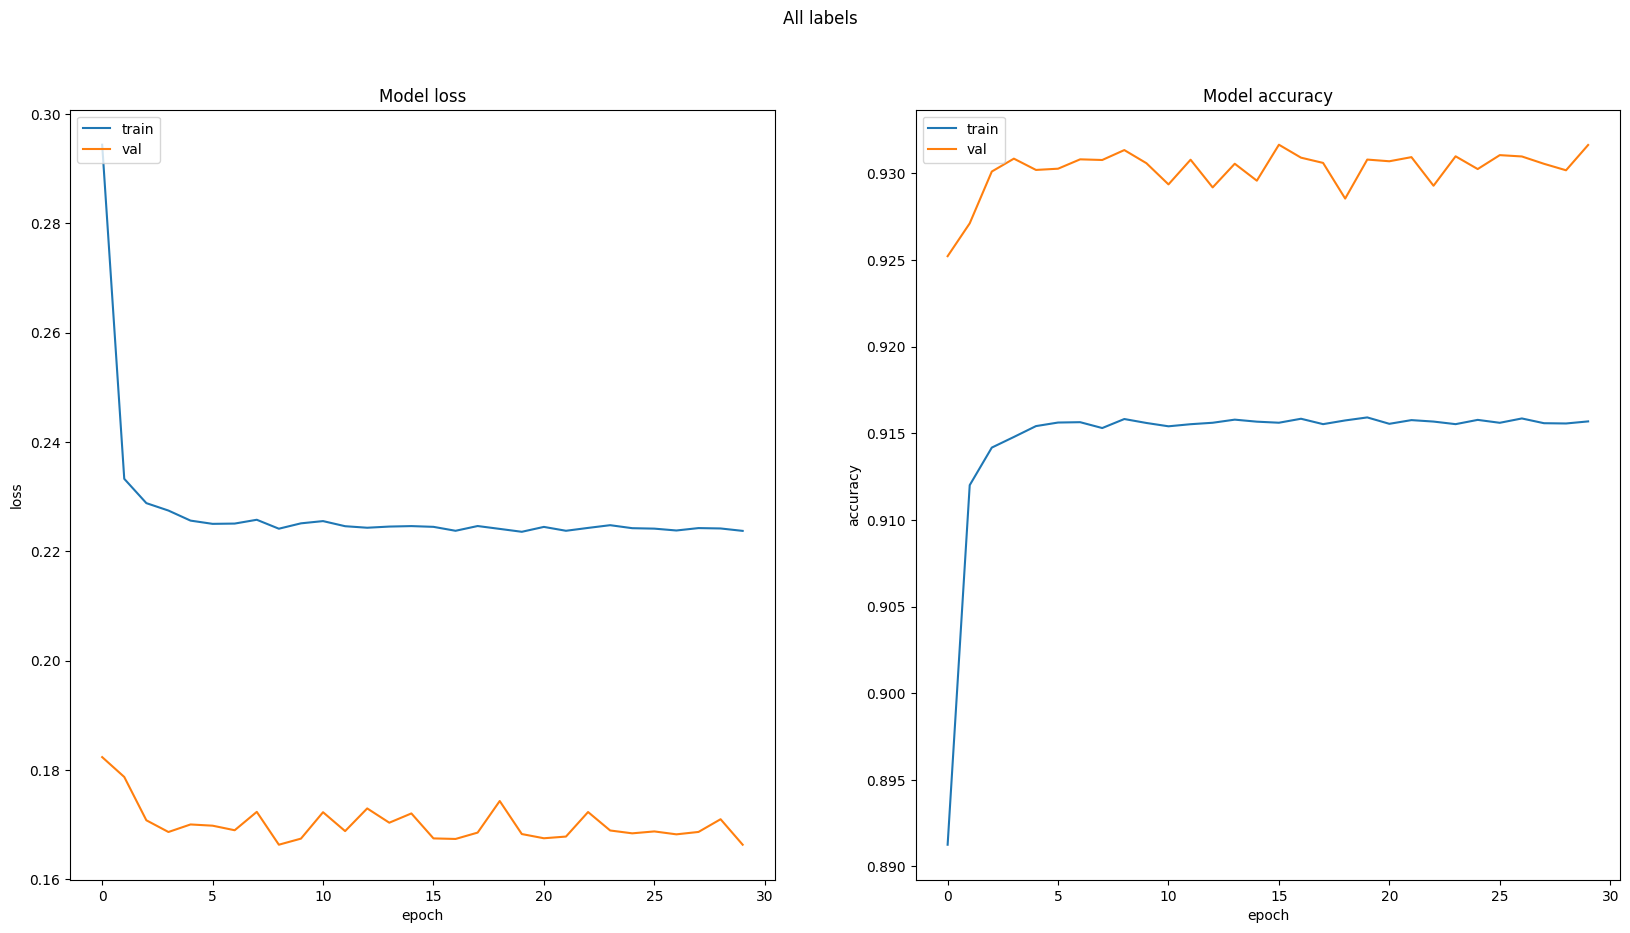

In [14]:
plt.figure(figsize=(20, 10)).suptitle("All labels")
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')


In [15]:
y_pred = model.predict([
    test_x[:, :4], 
    test_x[:, 4:8], 
    test_x[:, 8:12],
    test_x[:, 12:16],
    test_x[:, 16:20]
])
y_true = test_y
y_pred = np.argmax(y_pred, 2)


cm_total = np.zeros((6, 6))

for y_t, y_p in zip(y_true, y_pred):
    cm = confusion_matrix(y_t, y_p, labels=[0, 1, 2, 3, 4, 5])
    cm = np.array(cm)
    cm_total = cm_total + cm


result = []
for cls in range(6):
    tp = cm_total[cls, cls]
    fn = np.sum(np.delete(cm_total[cls, :], cls))
    fp = np.sum(np.delete(cm_total[:, cls], cls))
    tn = np.delete(cm_total, cls, axis=0)
    tn = np.sum(np.delete(tn, cls, axis=1))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = (2 * precision * recall) / (precision + recall)
    acc = (tp + tn) / (tp + fn + tn + fp)
    specifity = tn/(tn+fp)

    result.append([precision, recall, f1, acc, specifity])

result = np.array(result)

829/829 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step


In [16]:
print(f'precision, recall, f1, acc, specifity\n{result}')

precision, recall, f1, acc, specifity
[[0.92832776 0.94819133 0.93815442 0.93258532 0.91432007]
 [0.92740641 0.87246243 0.8990958  0.9874588  0.9953272 ]
 [0.95998128 0.923468   0.94137071 0.98463584 0.99406541]
 [0.94939821 0.93651506 0.94291263 0.9861381  0.99304871]
 [0.91952963 0.91325331 0.91638072 0.98562791 0.99245788]
 [0.88259679 0.87586806 0.87921955 0.98684546 0.99326282]]


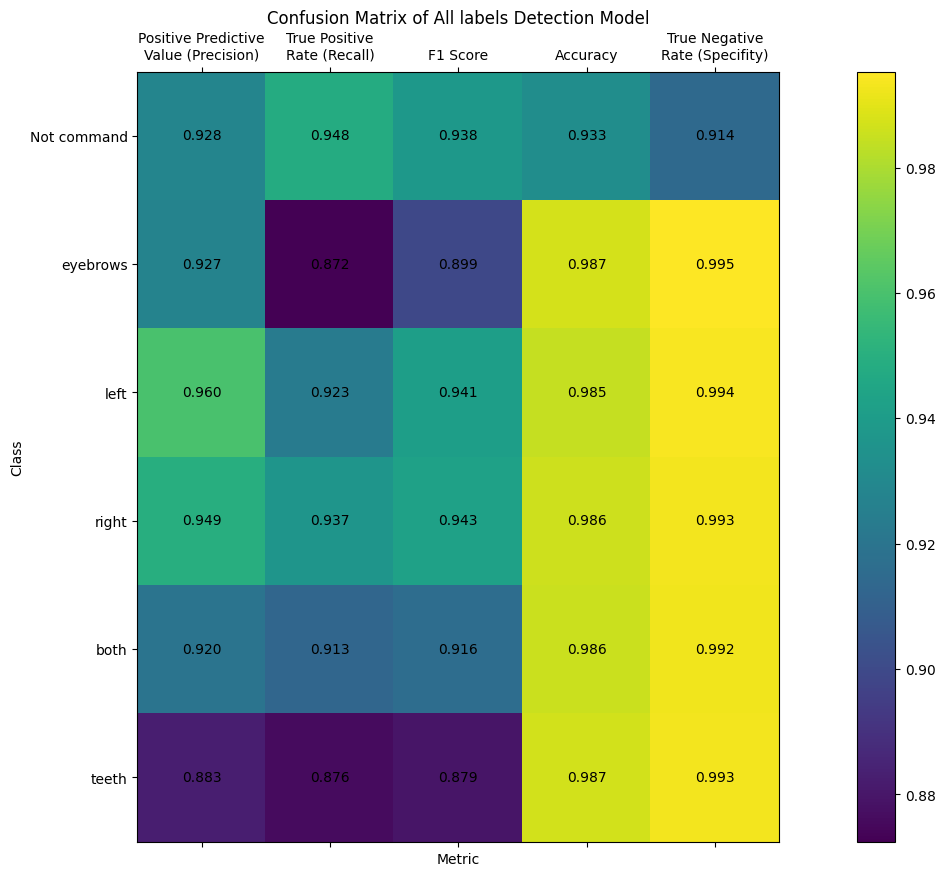

In [17]:
plt.figure(figsize=(20, 10))
plt.title("Confusion Matrix of All labels Detection Model")
plt.matshow(result, fignum=False)
plt.xticks([0, 1, 2, 3, 4], ['Positive Predictive\nValue (Precision)', 'True Positive\nRate (Recall)', 'F1 Score', 'Accuracy', 'True Negative\nRate (Specifity)'])
plt.yticks([0, 1, 2, 3, 4, 5], ['Not command', 'eyebrows', 'left', 'right', 'both', 'teeth'])
plt.xlabel("Metric")
plt.ylabel("Class")
for (i, j), z in np.ndenumerate(result):
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
plt.colorbar()

In [18]:
model.save(r'.\checkpoints\orthogonal_1.keras')